# Домашнее задание к 07.02.2019
## Многочлен Лагранжа

In [7]:
def lgrn_k(x, k, Xk):
    lst = []
    pr = 1
    for i in range (len(Xk)) :
        if i != k:
            lst.append ((x - Xk[i])/ (Xk[k]-Xk[i]))
    for j in range(len(Xk) -1 ):
        pr=  pr * lst[j]
    
    return (pr)
    

In [8]:
def lgrn(Xnew, Xs, Ys):
    return sum (Ys[n]*lgrn_k(Xnew, n, Xs) for n in range(len(Xs))) 


In [32]:
primer = [1, 2, 3, 4, 5]
znacheniia = [0.5 , 0.2, 0.1, 0.0588235294, 0.0384615385]
print(lgrn(5.1, primer, znacheniia))

0.03918504530115375


# График функции $1/(25x^2 +1)$
## Два способа: интерполяционный многочлен Лагранжа для равномерной сетки и для узлов Чебышева

In [5]:
import matplotlib.pyplot as plt

In [29]:
%matplotlib notebook

In [3]:
import numpy as np

### Равномерная сетка для 10 известных точек

<IPython.core.display.Javascript object>


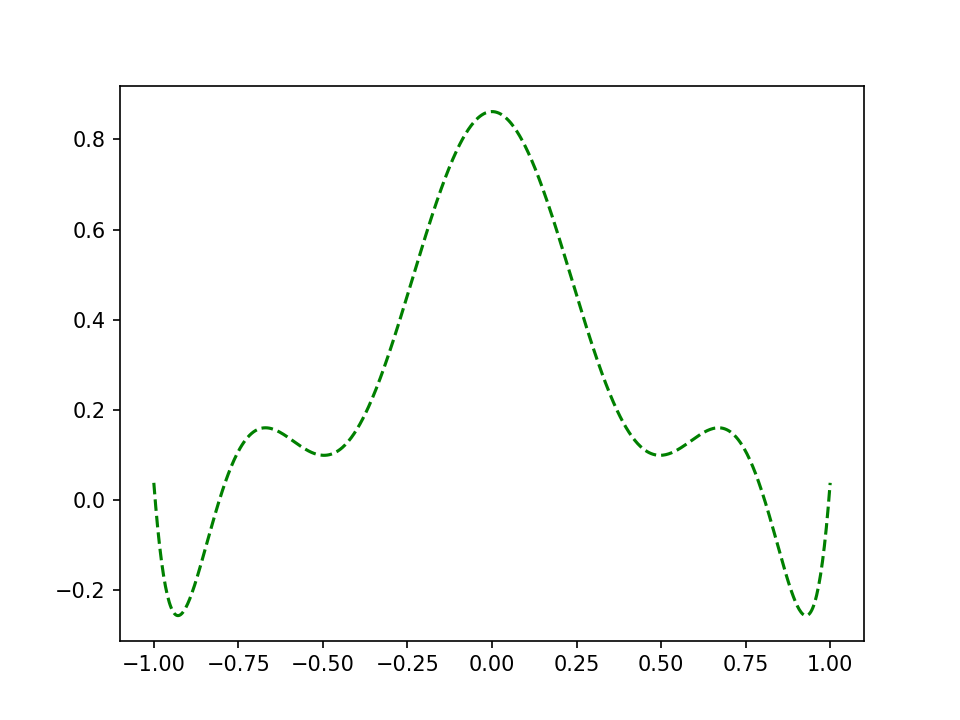

In [103]:
Xs = np.linspace (-1, 1, 10)
Ys = [1/(25*x**2 + 1) for x in Xs]
x = np.linspace (-1, 1, 700)
lstt = []
for f in x:
    
    lstt.append( lgrn(f, Xs, Ys))
plt.plot (x, lstt, "--", color = "green")
plt.show()

### Равномерная сетка для 20 известных точек

<IPython.core.display.Javascript object>


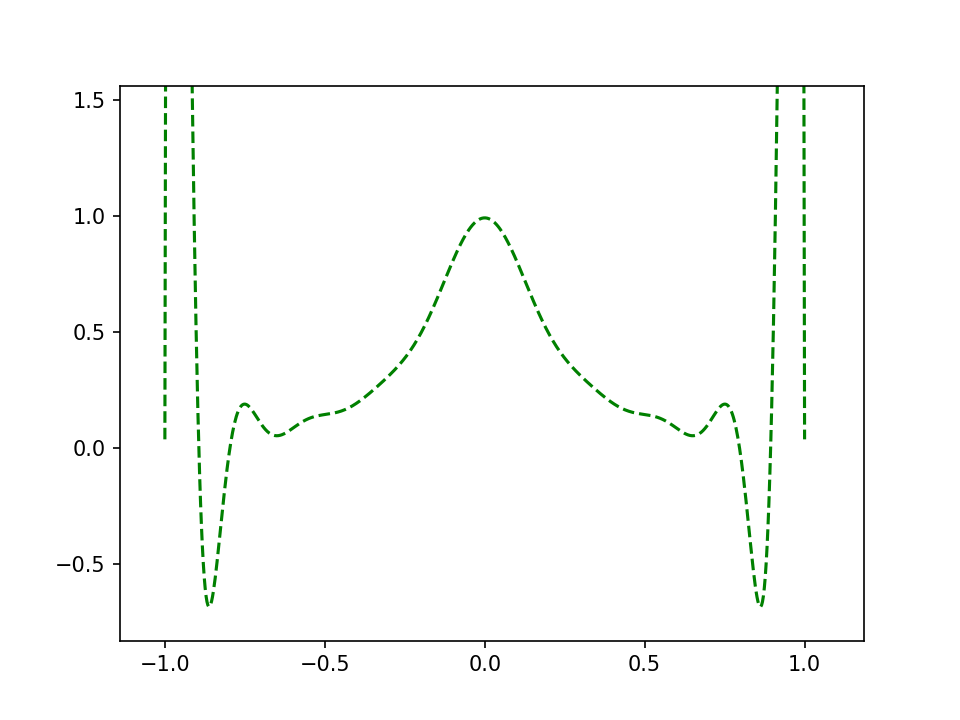

In [104]:
Xs = np.linspace (-1, 1, 20)
Ys = [1/(25*x**2 + 1) for x in Xs]
x = np.linspace (-1, 1, 700)
lstt = []
for f in x:
    lstt.append( lgrn(f, Xs, Ys))
plt.plot (x, lstt, "--", color = "green")
plt.show()

### Равномерная сетка для 50 известных точек

<IPython.core.display.Javascript object>


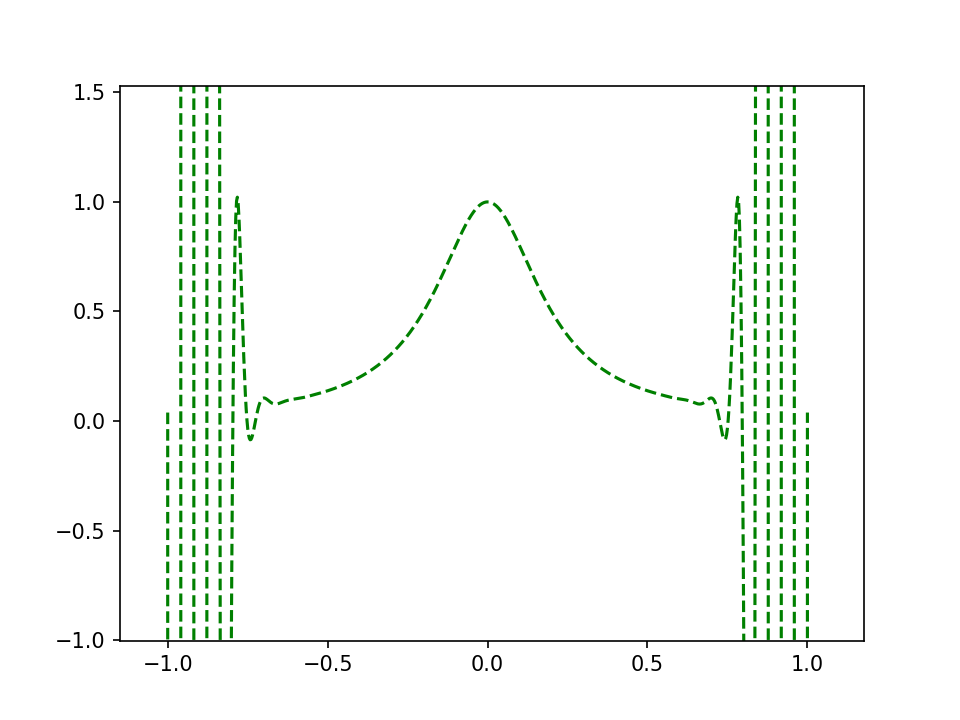

In [99]:
Xs = np.linspace (-1, 1, 50)
Ys = [1/(25*x**2 + 1) for x in Xs]
x = np.linspace (-1, 1, 800)
lstt = []
for f in x:
    lstt.append( lgrn(f, Xs, Ys))
plt.plot (x, lstt, "--", color = "green")
plt.show()

### Узлы Чебышева для 10 точек

<IPython.core.display.Javascript object>


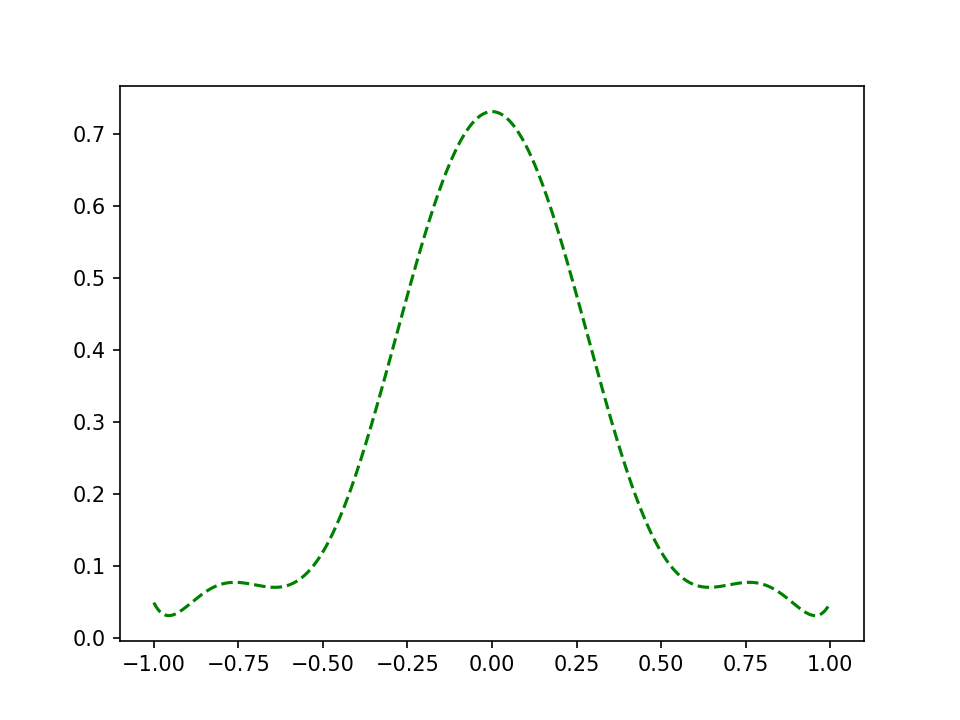

In [97]:
x = np.linspace (-1, 1, 700)
Xs=[]
for k in range(1, 11):

    Xs.append(np.cos(np.pi*(2*k - 1)/(2*10)))

lstt = []
Ys = [1/(25*i**2 + 1) for i in Xs]
for f in x:
    lstt.append( lgrn(f, Xs, Ys))
plt.plot (x, lstt, "--", color = "green")
plt.show()

### Узлы Чебышева для 20 точек

<IPython.core.display.Javascript object>


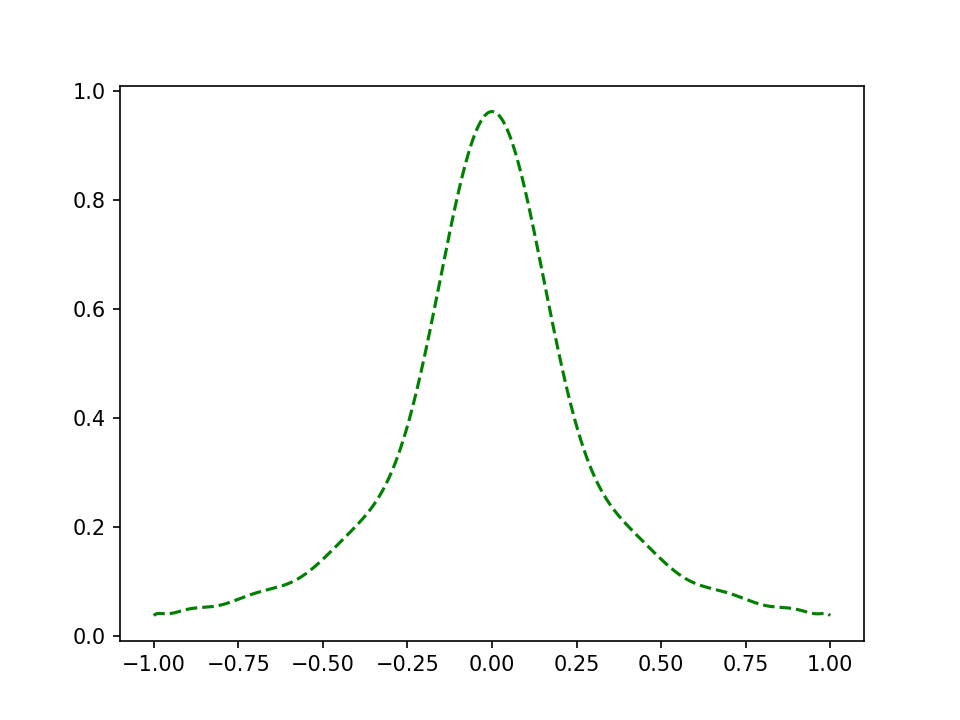

In [96]:
x = np.linspace (-1, 1, 700)
Xs=[]
for k in range(1, 21):

    Xs.append(np.cos(np.pi*(2*k - 1)/(2*20)))

lstt = []
Ys = [1/(25*i**2 + 1) for i in Xs]
for f in x:
    lstt.append( lgrn(f, Xs, Ys))
plt.plot (x, lstt, "--", color = "green")
plt.show()

### Узлы Чебышева для 100 точек

<IPython.core.display.Javascript object>


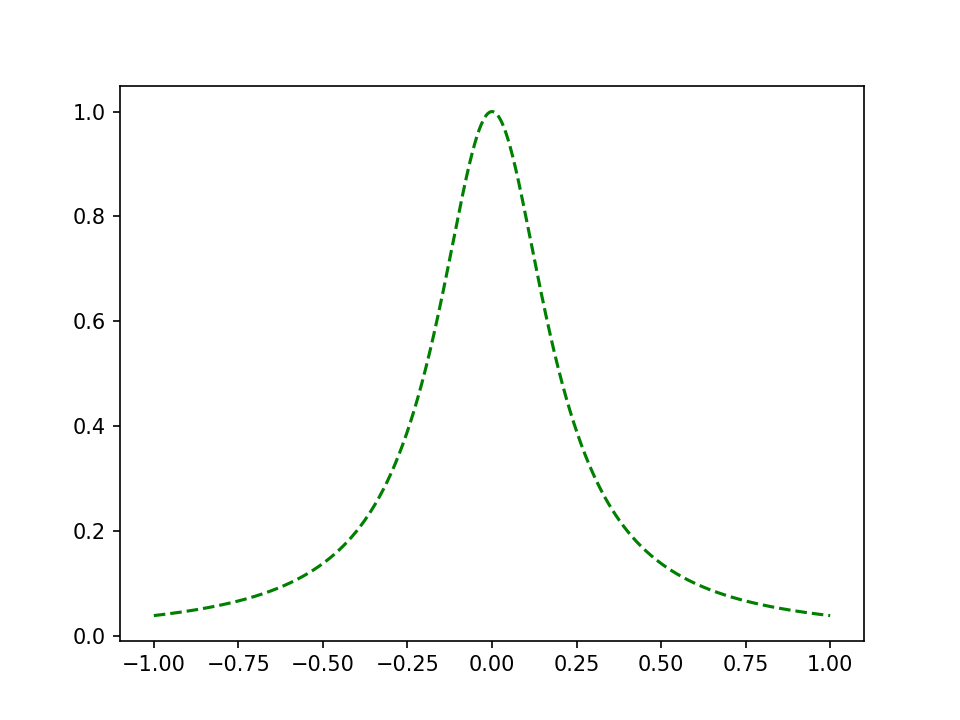

In [88]:
x = np.linspace (-1, 1, 700)
Xs=[]
for k in range(1, 101):

    Xs.append(np.cos(np.pi*(2*k - 1)/(2*100)))

lstt = []
Ys = [1/(25*i**2 + 1) for i in Xs]
for f in x:
    lstt.append( lgrn(f, Xs, Ys))
plt.plot (x, lstt, "--", color = "green")
plt.show()

# Угадывание функции "соседа" по известным точкам
X: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Y: [2, 3, 5, 9, 17, 33, 65, 129, 257, 513, 1025, 2049, 4097, 8193, 16385, 32769, 65537, 131073, 262145, 524289]

### 1-D интерполяция (из библиотеки  scipy.interpolate)

In [12]:
from scipy.interpolate import interp1d

In [81]:
Xs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Ys = [2, 3, 5, 9, 17, 33, 65, 129, 257, 513, 1025, 2049, 4097, 8193, 16385, 32769, 65537, 131073, 262145, 524289]
f = interp1d(Xs, Ys)
f2 = interp1d(Xs, Ys, kind='cubic')

<IPython.core.display.Javascript object>


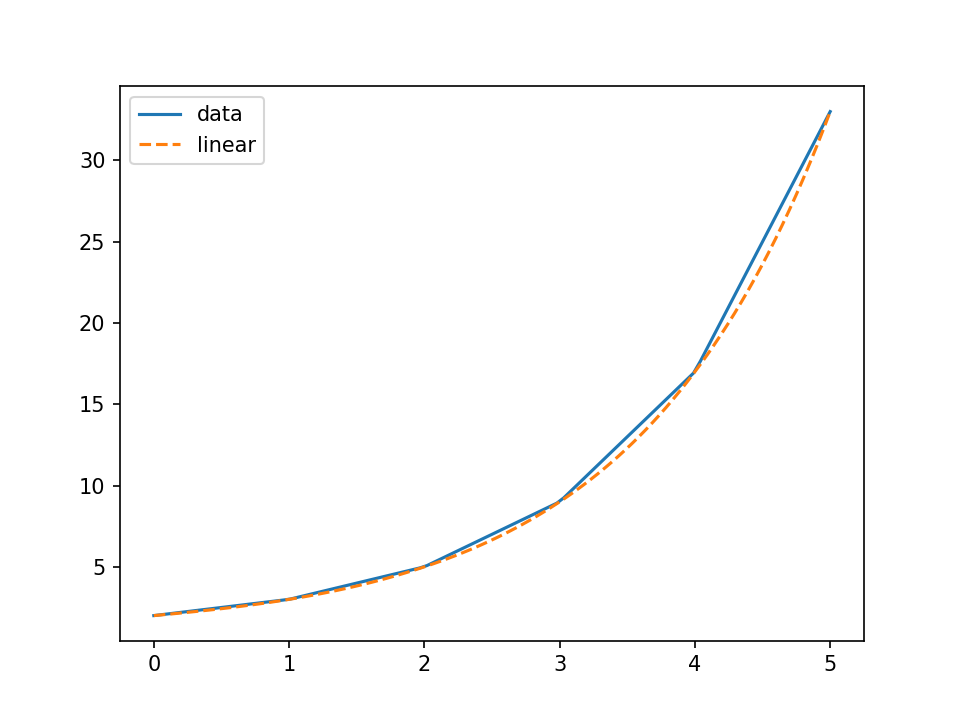

In [86]:
x = np.linspace(0, 5, 100)
plt.plot( x, f(x), '-', x, f2(x), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

### Интерполяция многочленом в форме Лагранжа

<IPython.core.display.Javascript object>


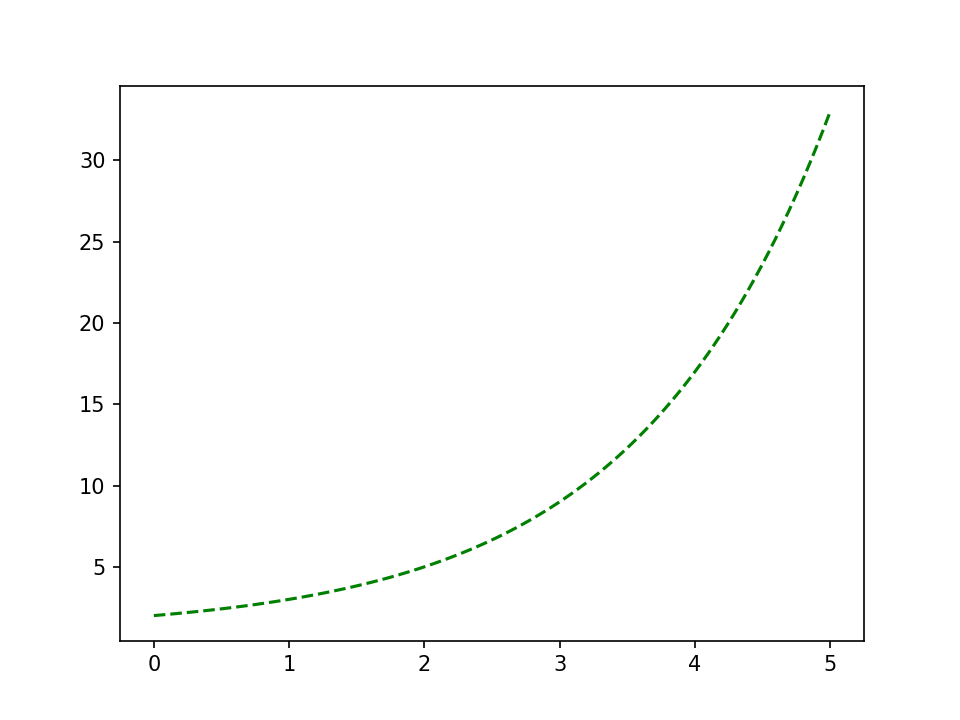

In [87]:
Xs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Ys = [2, 3, 5, 9, 17, 33, 65, 129, 257, 513, 1025, 2049, 4097, 8193, 16385, 32769, 65537, 131073, 262145, 524289]
x = np.linspace (0, 5, 100)
lstt = []
for f in x:
    lstt.append( lgrn(f, Xs, Ys))
plt.plot (x, lstt, "--", color = "green")
plt.show()

Можно предположить, что "сосед" загадал функцию y = 2^x + 1. Действительно, так и оказалось!